In [89]:
import pandas as pd
import random
import numpy as np
import time
import math
import sys
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import datatable as dt

from xgboost import plot_tree
from os import walk
from os import listdir
from os.path import isfile, join
from scipy.spatial.distance import euclidean, pdist, squareform
from scipy.stats import skew
from scipy.special import expit as sigmoid
from scipy.cluster.hierarchy import fclusterdata
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [90]:
plot_percentages = {
    "12-16": 0.0,
    "12-16": 0.0,
    "12-16": 0.0,
    "12-16": 0.0,
    "12-16": 0.0,
    "12-16": 0.0,
    "12-16": 0.0,
}

In [136]:
year_files = [
"20121231_20160511"
,"20140319_20150323"
,"20140319_20160307"
,"20140319_20180313"
,"20140319_20190910"
,"20150323_20160307"
,"20160307_20170307"
,"20160307_20180313"
,"20170307_20180313"
,"20180313_20190910"
]

## Plotting year-gap wise separation percentages

In [137]:
df = None
year_wise_separation_percent = {}
for file in year_files:
#     print(file_path)
    try:
        file_path = "stats/" + file + "/total_separation_percentage.csv"
        df = pd.read_csv(file_path, sep="\t")
        before_year = int(file.split("_")[0][:4])
        after_year = int(file.split("_")[1][:4])
        if (after_year - before_year == 1):
            year_wise_separation_percent[str(before_year) + "_" + str(after_year)] = df["percentage"][0]
    
    except FileNotFoundError as f:
        print()
        print("File not present: " + file_path)
        print()
    


File not present: stats/20121231_20160511/total_separation_percentage.csv



In [138]:
year_wise_separation_percent

{'2014_2015': 6.447721473376924,
 '2015_2016': 6.244445175943909,
 '2016_2017': 7.789283954224339,
 '2017_2018': 5.967456049303994,
 '2018_2019': 9.431048616719163}

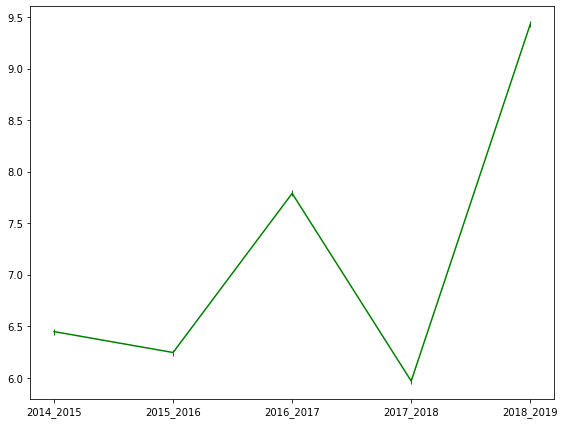

In [139]:
temp_df = pd.DataFrame({"years": list(year_wise_separation_percent.keys()), "separation-percentages": list(year_wise_separation_percent.values())})

figures, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
# sns.lineplot(x="years", y="separation-percentages",  markers=True, data=temp_df, ax=axes)
axes.plot(list(year_wise_separation_percent.keys()), list(year_wise_separation_percent.values()), marker='|', color='g')
plt.savefig("single_year_gap_separation_percentage")
plt.tight_layout()


File not present: stats/20121231_20160511/total_separation_percentage.csv



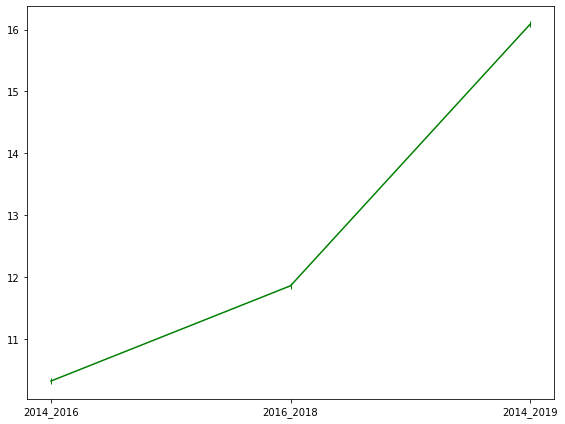

In [166]:
df = None
years = []
percents = []
percent_14_19 = None
for file in year_files:
#     print(file_path)
    try:
        file_path = "stats/" + file + "/total_separation_percentage.csv"
        df = pd.read_csv(file_path, sep="\t")
        before_year = int(file.split("_")[0][:4])
        after_year = int(file.split("_")[1][:4])
        if (before_year == 2018 and after_year == 2019):
            continue
        if (before_year == 2014 and after_year == 2016) or (before_year == 2016 and after_year == 2018) or (before_year == 2018 and after_year == 2019):
            years.append(str(before_year) + "_" + str(after_year))
            percents.append(df["percentage"][0])
        if before_year == 2014 and after_year == 2019:
            percent_14_19 = df["percentage"][0]
    
    except FileNotFoundError as f:
        print()
        print("File not present: " + file_path)
        print()


figures, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
axes.plot(years + ["2014_2019"], percents + [percent_14_19], marker='|', color='g')
plt.savefig("two_year_gap_separation_percentage")
plt.tight_layout()

## Plot age difference correlation plots

In [141]:
age_diff_bucket = {}
for file in year_files:
    print(file_path)
    try:
        file_path = "stats/" + file + "/age_diff_separation_stats.csv"
        df = pd.read_csv(file_path, sep="\t")
        before_year = int(file.split("_")[0][:4])
        after_year = int(file.split("_")[1][:4])

        age_diffs = df["age_diff"].tolist()
        sep_percents = df["separated_percentage"].tolist()
        
        i = 0
        for d in age_diffs:
            if d not in age_diff_bucket:
                age_diff_bucket[d] = []
            
            age_diff_bucket[d].append(sep_percents[i])
            i += 1
        
    except FileNotFoundError as f:
        print()
        print("File not present: " + file_path)
        print()

stats/20180313_20190910/total_separation_percentage.csv

File not present: stats/20121231_20160511/age_diff_separation_stats.csv

stats/20121231_20160511/age_diff_separation_stats.csv
stats/20140319_20150323/age_diff_separation_stats.csv
stats/20140319_20160307/age_diff_separation_stats.csv
stats/20140319_20180313/age_diff_separation_stats.csv
stats/20140319_20190910/age_diff_separation_stats.csv
stats/20150323_20160307/age_diff_separation_stats.csv
stats/20160307_20170307/age_diff_separation_stats.csv
stats/20160307_20180313/age_diff_separation_stats.csv
stats/20170307_20180313/age_diff_separation_stats.csv


In [142]:
# print(str(age_diff_bucket))

In [143]:
diff_tags = []
sep_percents = []
for a in age_diff_bucket:
    sep_percents = sep_percents + age_diff_bucket[a]
    diff_tags = diff_tags + [a] * len(age_diff_bucket[a])

In [144]:
age_diff_df = pd.DataFrame({"age_diff": diff_tags, "seperation_percentage": sep_percents})

In [146]:
age_diff_df.corr()

,age_diff,seperation_percentage
age_diff,1.000000,0.521416
seperation_percentage,0.521416,1.000000


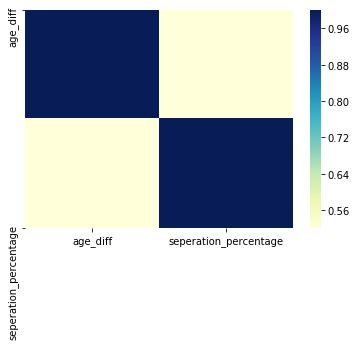

In [145]:
sns.heatmap(age_diff_df.corr(), cmap="YlGnBu")
plt.savefig("age_diff_separation_correlation")

In [149]:
import scipy.stats as stats
pearson_corr, corr_pvalue = stats.pearsonr(age_diff_df['age_diff'], age_diff_df['seperation_percentage'])

In [150]:
print(pearson_corr)
print(corr_pvalue)

0.5214156358374296
2.0737825815305297e-11


## County wise separation percentages

In [167]:
county_files = [
'20140319_20190910_BAK'
, '20140319_20190910_CAL'
, '20140319_20190910_LAF'
, '20140319_20190910_LAK'
, '20140319_20190910_SEM'
, '20180313_20190910_DAD'
]

In [168]:
county_sep_percent = {}
county_names = []
county_percents = []
for county_f in county_files:
    file_path = "stats/" + county_f + "/total_separation_percentage.csv"
    df = pd.read_csv(file_path, sep="\t")
    county_name = county_f.split("_")[-1]
    county_names.append(county_name)
    county_percents.append(df["percentage"][0])


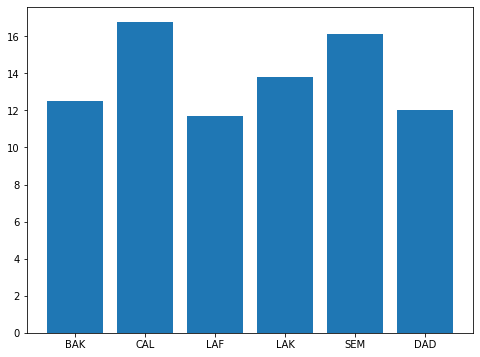

<Figure size 432x288 with 0 Axes>

In [169]:
figures, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
axes.bar(county_names, county_percents)
plt.show()
plt.savefig("county_wise_percent_separation")

## Racewise countwise percentages

In [170]:
race_desc_county_files = [
'20140319_20190910_BAK/race_desc_totalCouples-3157.csv_BAK'
, '20140319_20190910_CAL/race_desc_totalCouples-1456.csv_CAL'
, '20140319_20190910_LAF/race_desc_totalCouples-922.csv_LAF'
, '20140319_20190910_LAK/race_desc_totalCouples-42633.csv_LAK'
, '20140319_20190910_SEM/race_desc_totalCouples-57402.csv_SEM'
, '20180313_20190910_DAD/race_desc_totalCouples-252124.csv_DAD'
]

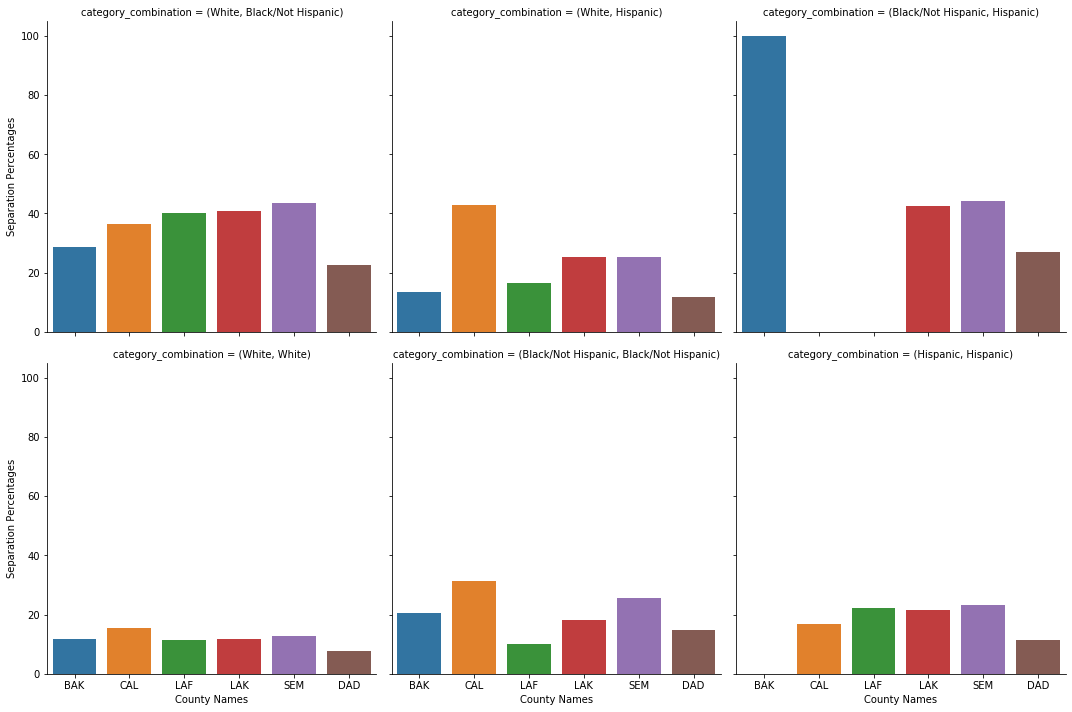

In [171]:
county_sep_percent = {}
county_names = []
county_percents = []
final_df = None
for county_f in race_desc_county_files:
    file_path = "stats/" + county_f
    df = pd.read_csv(file_path, sep="\t")
    county_name = county_f.split("_")[-1]
    df["county_name"] = county_name
    final_df = pd.concat([final_df, df])
    county_names.append(county_name)

final_df = final_df[final_df["category_combination"].str.contains("Other") == False]    
g = sns.catplot(x="county_name", y="percent", col="category_combination", kind="bar", data=final_df, col_wrap=3, legend=True)
g.set_axis_labels("County Names", "Separation Percentages")
# g.set_titles("{County Names} {Separation Percentages}")


plt.savefig("race_wise_percent_separation")

## Partywise countywise percentages

In [172]:
party_county_files = [
'20140319_20190910_BAK/party_affiliation_totalCouples-3157.csv_BAK'
, '20140319_20190910_CAL/party_affiliation_totalCouples-1456.csv_CAL'
, '20140319_20190910_LAF/party_affiliation_totalCouples-922.csv_LAF'
, '20140319_20190910_LAK/party_affiliation_totalCouples-42633.csv_LAK'
, '20140319_20190910_SEM/party_affiliation_totalCouples-57402.csv_SEM'
, '20180313_20190910_DAD/party_affiliation_totalCouples-252124.csv_DAD'
]

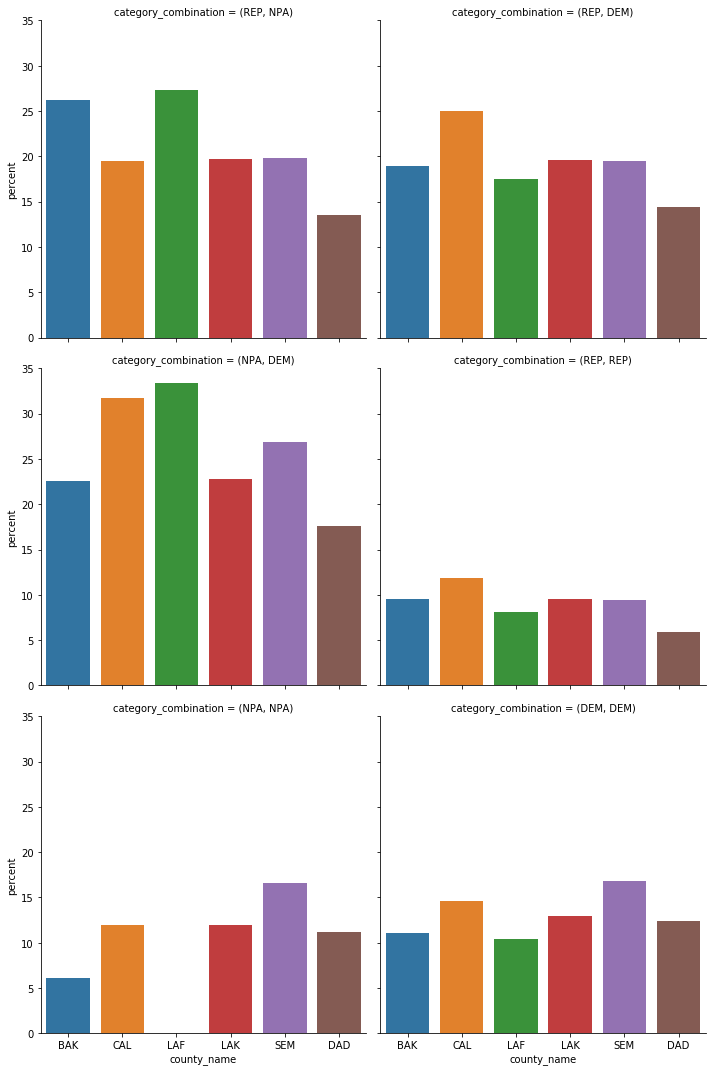

In [173]:
county_sep_percent = {}
county_names = []
county_percents = []
final_df = None
for county_f in party_county_files:
    file_path = "stats/" + county_f
    df = pd.read_csv(file_path, sep="\t")
    county_name = county_f.split("_")[-1]
    df["county_name"] = county_name
    final_df = pd.concat([final_df, df])
    county_names.append(county_name)

final_df = final_df[final_df["category_combination"].str.contains("Other") == False]        
g = sns.catplot(x="county_name", y="percent", col="category_combination", kind="bar", data=final_df, col_wrap=2)
plt.savefig("Partywise_county_separation_percentage")